<a href="https://colab.research.google.com/github/Zeljana-Amidzic/PPPO-IT-25-2018-Amidzic-Zeljana/blob/main/IT25_2018_Amidzic_Zeljana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *PPPO 2022 - Projekat: Detekcija defekata čelika*

**Tema:** Detekcija oštećenja površine čelika u svrsi provere kvaliteta materijala pre dalje produkcije. Sam projekat se bazira na korišćenju seta podataka (u ovom slučaju fotografija) i njihovoj proveri upotrebom algoritma koji treba da ustanovi postojanje eventualnih oštećenja materijala. Algoritam se sastoji od postupka detekcije oštećenja materijala a potom klasifikacije fotografija u jednu od kategorija, u ovom slučaju materijal može biti oštećen ili ne.

# **Učitavanje fotografija**

Kao set podataka za projekat koriste se fotografije koje se nalaze u dodeljenom folderu. Fotografije su smeštene u zipovan folder koji je podignut na Google Drive, a u naredne dve linije koda je folder učitan a zatim unzipovan folder sa fotografijama pod nazivom images.

In [1]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1swD3_-acnDAOigOiZlKlf-a5OPw7ebNS' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1swD3_-acnDAOigOiZlKlf-a5OPw7ebNS" -O images.zip && rm -rf /tmp/cookies.txt

--2022-07-14 19:30:53--  https://docs.google.com/uc?export=download&confirm=t&id=1swD3_-acnDAOigOiZlKlf-a5OPw7ebNS
Resolving docs.google.com (docs.google.com)... 173.194.216.102, 173.194.216.100, 173.194.216.138, ...
Connecting to docs.google.com (docs.google.com)|173.194.216.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gv3073dl5g3klnprheo894a3o15aeibn/1657827000000/06049624160957438625/*/1swD3_-acnDAOigOiZlKlf-a5OPw7ebNS?e=download&uuid=3065b5e1-8232-4cbc-9d95-c3952e30336c [following]
--2022-07-14 19:30:53--  https://doc-0g-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gv3073dl5g3klnprheo894a3o15aeibn/1657827000000/06049624160957438625/*/1swD3_-acnDAOigOiZlKlf-a5OPw7ebNS?e=download&uuid=3065b5e1-8232-4cbc-9d95-c3952e30336c
Resolving doc-0g-64-docs.googleusercontent.com (doc-0g-64-docs.googleusercontent.com)... 142.250.97.1

In [2]:
!unzip images.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_images/99f75320d.jpg  
  inflating: train_images/99f9d2375.jpg  
  inflating: train_images/99fd3c6f5.jpg  
  inflating: train_images/9a016fe15.jpg  
  inflating: train_images/9a064450d.jpg  
  inflating: train_images/9a08c2783.jpg  
  inflating: train_images/9a18e4457.jpg  
  inflating: train_images/9a1f7c238.jpg  
  inflating: train_images/9a2523ce9.jpg  
  inflating: train_images/9a3e774ff.jpg  
  inflating: train_images/9a5e9e77c.jpg  
  inflating: train_images/9a5f7a855.jpg  
  inflating: train_images/9a62177bb.jpg  
  inflating: train_images/9a67575cf.jpg  
  inflating: train_images/9a6ac5406.jpg  
  inflating: train_images/9a70057c0.jpg  
  inflating: train_images/9a72fd89e.jpg  
  inflating: train_images/9a75974ba.jpg  
  inflating: train_images/9a762b892.jpg  
  inflating: train_images/9a7b2f3af.jpg  
  inflating: train_images/9a7b427b4.jpg  
  inflating: train_images/9a81a8056.jpg  
  inflating: train_images

Narednom linijom koda, uz pomoć biblioteke matplotlib, učitavane su pojedinačne fotografije kako bih se na taj način upoznala sa fotografijama i prostudirala šta se nalazi na njima. Nakon pretrage na internetu, uočeno je da se na fotografijama nalazi površina čelika kroz koju se utvrđuje da li na materijalu postoje oštećenja.

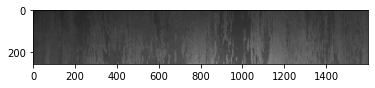

In [3]:
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
image =(imread('train_images/eb5a90623.jpg'))
plt.imshow(image)
plt.show()

Naredna linija koda je preuzeta sa interneta i služi potrebi da se prikaže na koji način treba da funkcioniše algoritam koji se kreira projektom. Prikazene su identične fotografije, prva originalna fotografija potom istina (ono što je stvarno na slici, odnosno primećena oštećenja) i zatim on što je algoritam predvideo.

In [4]:
#@markdown Klasa + Maska Primeri Predikcije
%%html
<div style = "max-width:900px" align="center">
<iframe src="https://rexvaz.com/files/steel_defects/slides.html" width="100%" height="320" 
frameBorder="0"></iframe>
</div>

# **Podešavanja**

Narednom linijom se može videti koje su sve biblioteke korišćene za potrebe projekta, učitane su većinski u ovom delu.

In [5]:
import os
import glob
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import keras
from PIL import Image
from pathlib import Path
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.models import Sequential, Model, load_model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, Activation
from keras.optimizers import adam_v2, sgd_experimental, rmsprop_v2
from keras.callbacks import Callback, EarlyStopping
from keras.utils import tf_utils
from sklearn.metrics import confusion_matrix
from keras import backend as K
import tensorflow as tf
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

Potom je učitan csv fajl u okviru kog se nalaze nazivi fotografija, klase kojoj pripadaju i encodovane vrednosti pixela fotografija. Ovaj fajl se kasnije koristi za treniranje algoritma kako bi kasnije mogao da izvrši klasifikaciju fotografija u ispravnu klasu.

In [6]:
data = pd.read_csv("/content/train.csv")

U narednim linija upoznavala sam se sa setom podataka (data), a to sam uradila kroz plotovanje preko bar plot vrste grafikona, prikazivanja broja kolona i redova (shape) i učitala ga kako bih videla šta se u njemu nalazi. 

3    5150
1     897
4     801
2     247
Name: ClassId, dtype: int64

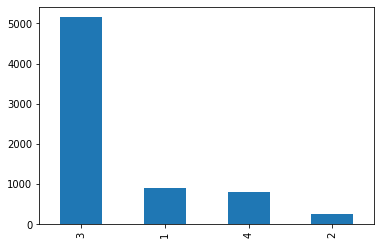

In [7]:
data["ClassId"].value_counts().plot(kind = 'bar')
data["ClassId"].value_counts()

In [8]:
data

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...
...,...,...,...
7090,ffcf72ecf.jpg,3,121911 34 122167 101 122422 169 122678 203 122...
7091,fff02e9c5.jpg,3,207523 3 207777 9 208030 15 208283 22 208537 2...
7092,fffe98443.jpg,3,105929 5 106177 14 106424 24 106672 33 106923 ...
7093,ffff4eaa8.jpg,3,16899 7 17155 20 17411 34 17667 47 17923 60 18...


In [9]:
data.shape

(7095, 3)

In [10]:
data.info

<bound method DataFrame.info of             ImageId  ClassId  \
0     0002cc93b.jpg        1   
1     0007a71bf.jpg        3   
2     000a4bcdd.jpg        1   
3     000f6bf48.jpg        4   
4     0014fce06.jpg        3   
...             ...      ...   
7090  ffcf72ecf.jpg        3   
7091  fff02e9c5.jpg        3   
7092  fffe98443.jpg        3   
7093  ffff4eaa8.jpg        3   
7094  ffffd67df.jpg        3   

                                          EncodedPixels  
0     29102 12 29346 24 29602 24 29858 24 30114 24 3...  
1     18661 28 18863 82 19091 110 19347 110 19603 11...  
2     37607 3 37858 8 38108 14 38359 20 38610 25 388...  
3     131973 1 132228 4 132483 6 132738 8 132993 11 ...  
4     229501 11 229741 33 229981 55 230221 77 230468...  
...                                                 ...  
7090  121911 34 122167 101 122422 169 122678 203 122...  
7091  207523 3 207777 9 208030 15 208283 22 208537 2...  
7092  105929 5 106177 14 106424 24 106672 33 106923 ...  
709

# Augmentacija fotografija

Augmentacija fotografija predstavlja procedura u okviru koje se skup podataka ciljano proširuje primenom različitih transformacija koje se sprovode nad slikama. Svrha augmentacije je dvostruka, s jedne strane poboljšava preciznost i tačnost modela, a s druge će omogućiti generalizovanje modela. Primenom raznih transformacija moguće je konstruisati slike koje se dosta razlikuju od onih koje se nalaze u skupu podataka, ali se očekuje da model može ispravno da ih klasifikuje.

tqdm je biblioteka koja omogućava prikaz progresa realizacije prolaska kroz podatke (niz).
cv2 modul koji omogućava razne vrste funkcija koje se odnose na kompjutersku viziju.
Prolaskom kroz slike iz seta podataka (data), iščitava se slika i smešta u promenljivu image koja se formatira (u smislu menja se njena visina i širina), potom se slika dodaje u niz l1, a njena klasa u niz l2. Postupak se ponavlja svakim prolazom kroz niz, a na kraju imamo dva niza l1 u kom su sve fotografije i l2 u kom su klase forografija iz niza l1, u odgovarajućem redosledu.

In [11]:
l1=[]
l2=[]
for img,ClassId,EncodedPixels in tqdm(data.values):
  image=cv2.imread("/content/train_images/{}".format(img), cv2.IMREAD_COLOR)
  image=cv2.resize(image, (150,150))
  l1.append(image)
  l2.append(ClassId)

100%|██████████| 7095/7095 [00:53<00:00, 133.42it/s]


Narednom linijom koda se učitava fotografija iz niza l1 koja se nalazi na poziciji sa indexom 120 u ovom slučaju.

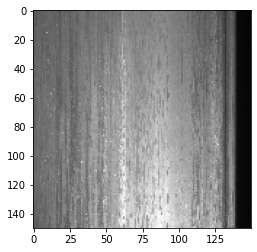

In [12]:
i = 120
plt.imshow(l1[i])

# Normalizacija piksela

Normalizacija je postupak u okviru kog se, u ovom slučaju, pikseli prevode u numerički zapis, kako bi na taj način algoritam mogao jednostavnije da ih obrađuje i koristi za donošenje odluke. Mašini je neophodno prevesti u numerički zapis kako bi mogla da razume šta je napisano u tekstu koji je razumljiv čoveku. U projektu se za postupak normalizacije koristi klasa LabelEncoder, koja input pretvara u klasu označenu brojevima od 0 do n-1, gde je n broj elemenata input-a.

In [13]:
encoder = LabelEncoder()

X=np.array(l1)
X=X/255

y=encoder.fit_transform(l2)
y=to_categorical(y)

# Treniranje modela

Prvi korak pri treniranju modela je podela seta podataka na trening i test podatke. Trening podaci se koriste da algoritam iz njih uči kako bi kasnije nad test podacima mogao da izvrši postupak detekcije oštećenja i klasifikacije fotografija u odgovarajuću klasu. Set podatak je podeljen u odnosu 80:20, 80% seta podataka se koristi za treniranje modela, a 20% se koristi za testiranje modela.

**Hiper parametri:**X i y su nizovi koji se koriste za podelu; test_size je parametar koji ukazuje u kom opsegu se vrši podela seta podataka; stratify govori o tome da se set podataka deli u stilu stratifikacije, u zavisnosti je od labela set podataka; shuffle je parametar kojim se ukazuje da li će se set podataka promešati pre nego što se izvrši podela; random_state je parametar koji kontroliše mešanje primenjeno na podatke pre primene podele, prosleđivanjem int se dobija ponovljiv izlaz u višestrukim pozivima funkcija.

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,shuffle=True,random_state=50)

In [15]:
print("X trening: ",X_train.shape)
print("X test: ",X_test.shape)
print("y trening: ",y_train.shape)
print("y test: ",y_test.shape)

X trening:  (5676, 150, 150, 3)
X test:  (1419, 150, 150, 3)
y trening:  (5676, 4)
y test:  (1419, 4)


## Kreiranje CNN modela

Convolutional Neural Network - CNN predstavlja model deep learning-a kojim se vrši klasifikacija fotografija u kontekstu kompjuterske vizije. Na model se dodaju nivoi, što je veći broj nivoa može doći do smanjenja visine i širine što se dublje zalazi u mrežu, što se H i W više smanjuju može se priuštiti da se povećava broj izlaznih kanala. Broj izlaznih kanala se kontroliše prvim argumentom koji je 32 ili 64. Kako bi se upotpunio model, na vrhi se dodaju Dense nivoi koji omogućavaju postupak klasifikacije ulaza. Dense prihvata vektore kao ulaz koji su 1D, a trenutni ulazi su 3D, da bi se 3D ulazi raspakovali i dali Dense nivou na korišćenje, dodaje se još jedan nivou Flatten. Pošto se fotografije stavljaju u jednu od 4 kategorije, Dense će imati 4 outputa (poslednja linija narednog koda).

In [16]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(150,150,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(4,activation="softmax"))

Narednom linijom koda se prikazuju detalji izgrađenog modela.

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 14400)             0         
                                                                 
 dense (Dense)               (None, 256)               3

Zastuvljanje treniranja modela kada metrike prestanu da ostvaruju bolje rezultate. Za to se koristi klasa EarlyStopping. Argumenti: patience - broj epoha nakon koje se prekida trening ukoliko u okviru svake od epoha metrike ne pokažu bolje rezultate; min_delta - minimalna promena praćene metrike koja će se smatrati poboljšanjem; restore_best_weights - da li vratiti najbolje rezultate iz prethodne epohe u trenutnu epohu.

In [18]:
#early_stopping = tf.keras.callbacks.EarlyStopping(patience=5,min_delta=0.001,restore_best_weights=True)
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5,mode="min",monitor="val_loss",restore_best_weights=True)

## Kompajlovanje modela

Kompajliranje/konfigurisanje modela pre treninga se postiže metodom compile, argumenti metode su: loss - funkcija gubitka, njena svrha je da izračuna količinu metrike koju model treba da minimizira. U ovom slučaju funkcija koja se koristi omogućava izračunavanje unakrsne entropije između oznaka i prediktora; optimizer - optimizator klase. Adam klasa je optimizator koji minimizira grešku i implementira Adamov algoritam. Adamov optimizator je metoda stohastičkog gradijentalnog spusta koja se zasniva na adaptivnoj proceni momenta prvog i drugog reda. metrics - lista metrika koje će model da evaluira tokom treninga i testa, u ovom slučaju prati se tačnost (accuracy).

In [19]:
from sklearn import metrics
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

Sledeći korak je treniranje modela za zadati broj epoha, u ovom slučaju 15. Postupak se vrši primenom metode fit na kreirani model. Argumenti metode: X_train - ulazni niz podataka; y_train - ciljane vrednosti; epochs - broj epoha, iteracija nad setom podataka; validation_data - podaci na osnovu kojih treba proceniti gubitak i sve metrike modela na kraju svake epohe. Model neće biti obučen na ovim podacima; batch_size - broj uzoraka pri svakom pojedinačnom spustu; verbose - auto', 0, 1 ili 2. Režim opširnosti. 0 = tiho, 1 = traka napretka, 2 = jedna linija po epohi. 'auto' je podrazumevano 1 u većini slučajeva, ali 2 kada se koristi sa ParameterServerStrategy; callbacks - lista callback instanci koje se izvršavaju tokom treninga, ovde je to prethodno kreirana instanca koja zaustavlja trening (early_stopping).

In [20]:
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test),batch_size=128,
                    verbose=1, callbacks=[early_stopping])

Epoch 1/20
45/45 [==============================] - 111s 2s/step - loss: 0.7961 - accuracy: 0.7234 - val_loss: 0.7180 - val_accuracy: 0.7456
Epoch 2/20
45/45 [==============================] - 109s 2s/step - loss: 0.6429 - accuracy: 0.7553 - val_loss: 0.7224 - val_accuracy: 0.7505
Epoch 3/20
45/45 [==============================] - 107s 2s/step - loss: 0.6249 - accuracy: 0.7579 - val_loss: 0.5999 - val_accuracy: 0.7632
Epoch 4/20
45/45 [==============================] - 107s 2s/step - loss: 0.5773 - accuracy: 0.7646 - val_loss: 0.5714 - val_accuracy: 0.7667
Epoch 5/20
45/45 [==============================] - 107s 2s/step - loss: 0.5353 - accuracy: 0.7755 - val_loss: 0.5880 - val_accuracy: 0.7653
Epoch 6/20
45/45 [==============================] - 108s 2s/step - loss: 0.4995 - accuracy: 0.7863 - val_loss: 0.5372 - val_accuracy: 0.7766
Epoch 7/20
45/45 [==============================] - 108s 2s/step - loss: 0.4724 - accuracy: 0.7977 - val_loss: 0.5726 - val_accuracy: 0.7660
Epoch 8/20
45

Nakon što se izvrši kompajliranje i prolazak kroz set podataka u n epoha, rezultati treninga se smeštaju u data frame i rezultati se prikazuju putem grafova. Prvi graf se odnosi na funkciju gubitka, a drugi na tačnost kao metrika koja je praćena tokom treninga.

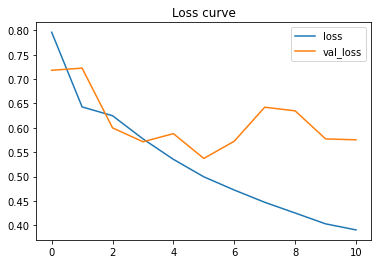

In [21]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title = 'Loss curve')

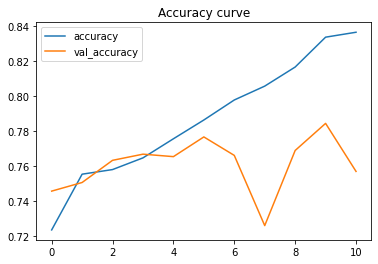

In [22]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title = 'Accuracy curve')

Prikaz rezultata koji su postignuti nad setom podataka sa korišćenjem kreiranog modela. Poziva se metoda evaluate kojoj se prosleđuju test setovi obeležja i ciljanih vrednosti. Metoda vraća rezultate gubitka i tačnosti koji su dobijeni primenom modela na set podataka. Ovim modelom dobijena je tačnost predviđanja klase slika 77.87%.

In [23]:
result = model.evaluate(X_test, y_test)

loss = result[0]
accuracy = result[1]
print(f"[+] Accuracy: {accuracy*100:.2f}%")

45/45 [==============================] - 8s 168ms/step - loss: 0.5372 - accuracy: 0.7766
[+] Accuracy: 77.66%


# Detekcija oštećenja 

Dalji deo rada namenjen je detekciji oštećenja odnosno klasifikovanju fotografija u odnosu na detektovana oštećenja. Za te potrebe je u promenljivu df smešten je train.csv fajl, sadržaj df promenljive je prikazan u narednim linijama. 

In [24]:
import random

In [25]:
df = pd.read_csv('/content/train.csv')

In [26]:
print('Dataframe shape: ', df.shape)
df.head()

Dataframe shape:  (7095, 3)


,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


Podela data frame-a po vrednosti ImageId.

In [27]:
df['ImageId'] = df['ImageId'].apply(lambda x: x.strip())
df.ImageId.describe()

count              7095
unique             6666
top       ef24da2ba.jpg
freq                  3
Name: ImageId, dtype: object

In [28]:
train_img_set = set(list(os.listdir('train_images')))
print('Ukupan broj fotografija u train_images folderu: ', len(train_img_set))
defect_img_set = set(df['ImageId'].values)
print('Ukupan broj fotografija uključenih u fajl train.csv: ', len(defect_img_set))
if (defect_img_set.issubset(train_img_set)):
    print('Svi ImageId koji se nalaze u train.csv su takođe u train_images folderu.')

Ukupan broj fotografija u train_images folderu:  12568
Ukupan broj fotografija uključenih u fajl train.csv:  6666
Svi ImageId koji se nalaze u train.csv su takođe u train_images folderu.


Broj ImageId-ijeva koji nisu oštećeni:  5902


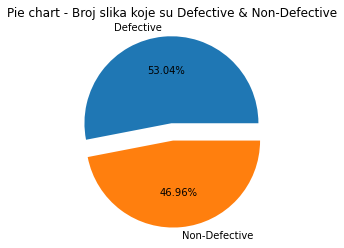

In [29]:
print('Broj ImageId-ijeva koji nisu oštećeni: ', len(train_img_set) - len(defect_img_set))
non_defect_img_set = train_img_set - defect_img_set

plt.pie([len(defect_img_set), len(non_defect_img_set)], labels = ['Defective', 'Non-Defective'], explode = [0.1]*2, startangle = 0, autopct='%1.2f%%')
plt.title('Pie chart - Broj slika koje su Defective & Non-Defective')
plt.show()

In [30]:
df['ClassId'].astype('str').describe()

count     7095
unique       4
top          3
freq      5150
Name: ClassId, dtype: object

Grafikon koji prikazuje udeo klase fotografija u celokupnom setu podataka / fotografija.

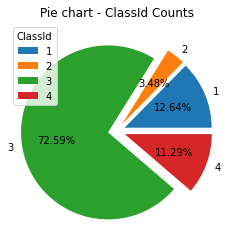

,ClassId,Count,count-percentage
0,1,897,12.642706
1,2,247,3.481325
2,3,5150,72.586328
3,4,801,11.289641


In [31]:
ClassId_cnt_df = pd.DataFrame(df['ClassId'].value_counts().sort_index()).rename(columns = {'ClassId':'Count'})
ClassId_cnt_df['count-percentage'] = ClassId_cnt_df*100/ClassId_cnt_df.sum()

plt.pie(ClassId_cnt_df['Count'], labels = ClassId_cnt_df['Count'].index, explode = [0.1]*4, startangle = 0, autopct='%1.2f%%')
plt.legend(title = "ClassId")
plt.title('Pie chart - ClassId Counts')
plt.show()

ClassId_cnt_df.reset_index().rename(columns = {'index':'ClassId'})

In [32]:
nos_labels_per_img_df = df.groupby('ImageId')['ClassId'].count()#reset_index()#.rename(columns = {'ClassId':'Count'})
nos_labels_per_img_df.head(10)

ImageId
0002cc93b.jpg    1
0007a71bf.jpg    1
000a4bcdd.jpg    1
000f6bf48.jpg    1
0014fce06.jpg    1
0025bde0c.jpg    2
002af848d.jpg    1
002fc4e19.jpg    2
0030401a5.jpg    1
0046839bd.jpg    1
Name: ClassId, dtype: int64

Prva sledeća linija koda odnosi se na broj uočenih oštećanja po slikama. Druga sledeća linija govori o tome kog su formata fotografije koje se nalaze u fajlu train_images koji je korišćen u projektu.

In [33]:
data = nos_labels_per_img_df.value_counts().sort_index()
for index, value in data.items():
    print("Number of images with {} number of defect labels: {}".format(index, value))

Number of images with 1 number of defect labels: 6239
Number of images with 2 number of defect labels: 425
Number of images with 3 number of defect labels: 2


In [34]:
img_shapes = set()
for img in list(os.listdir('train_images')):
    img_shapes.add(cv2.imread('train_images/'+img).shape)
img_shapes

{(256, 1600, 3)}

Definisanje metode koja na osnovu prosleđene fotografije generiše odgovarajuću masku koja prikazuje pozicuju prepoznatih oštećenja.

In [35]:
def rle2mask(mask_rle, shape=(1600,256)):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (width,height) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T

Prolazi se kroz čitav set podataka i za svaku pojedinačnu sliku generiše se njena maska pozivom prethodno definisane metode. Kao rezultat dobijaju se side-by-side stvarne fotografije i njihove maske, u rezultatu se prikazuju samo po pet fotografija iz svake klase.

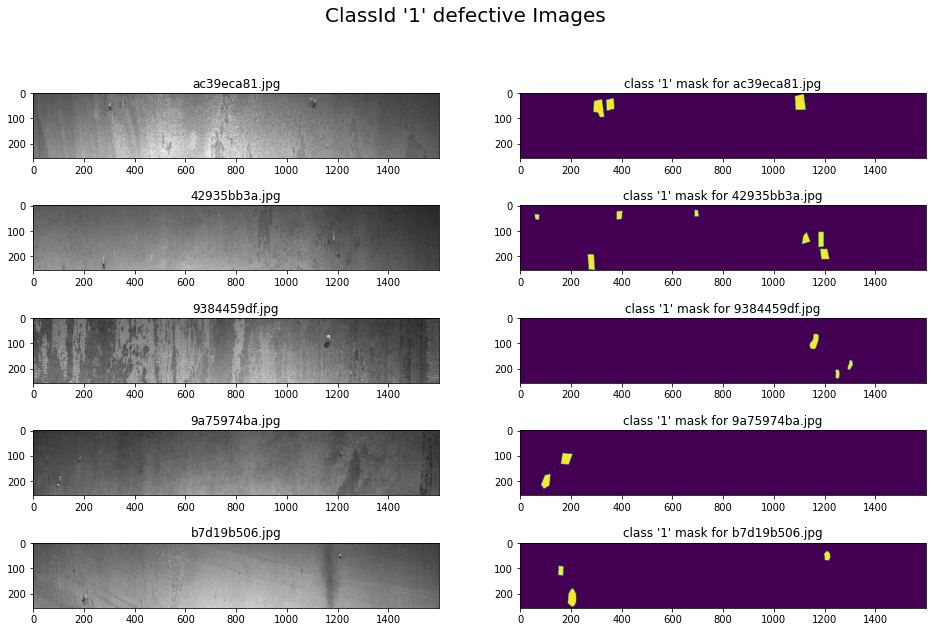

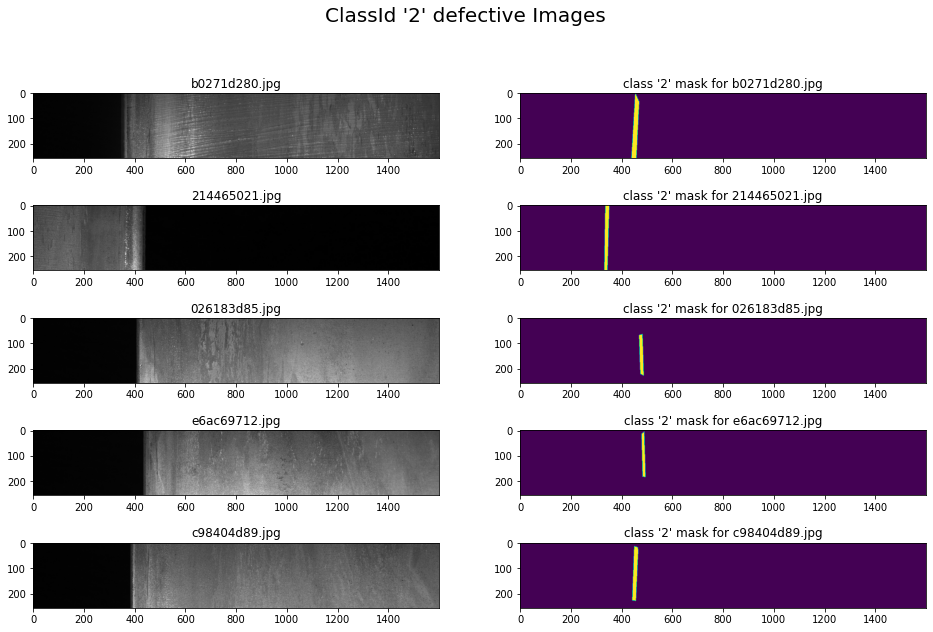

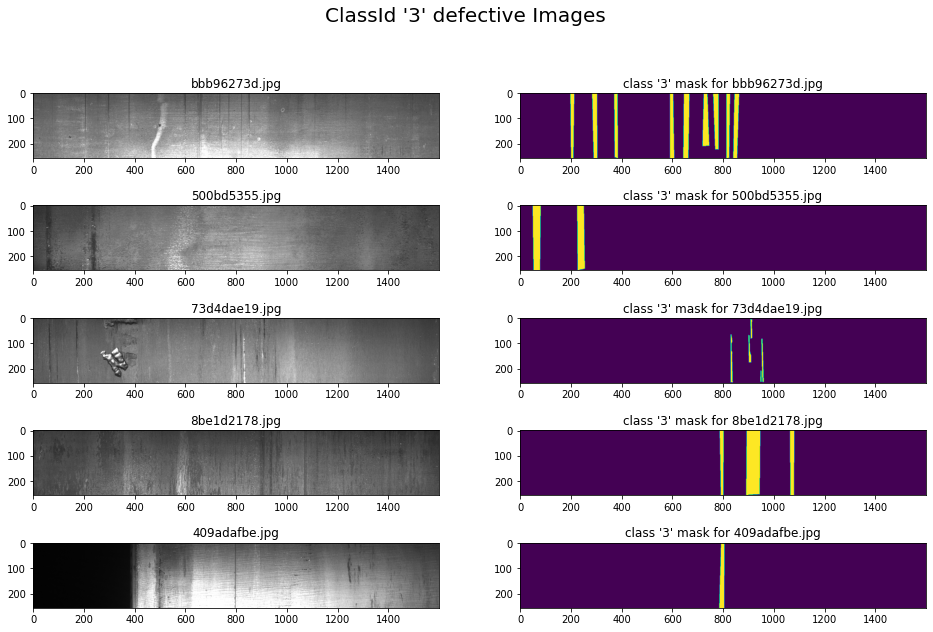

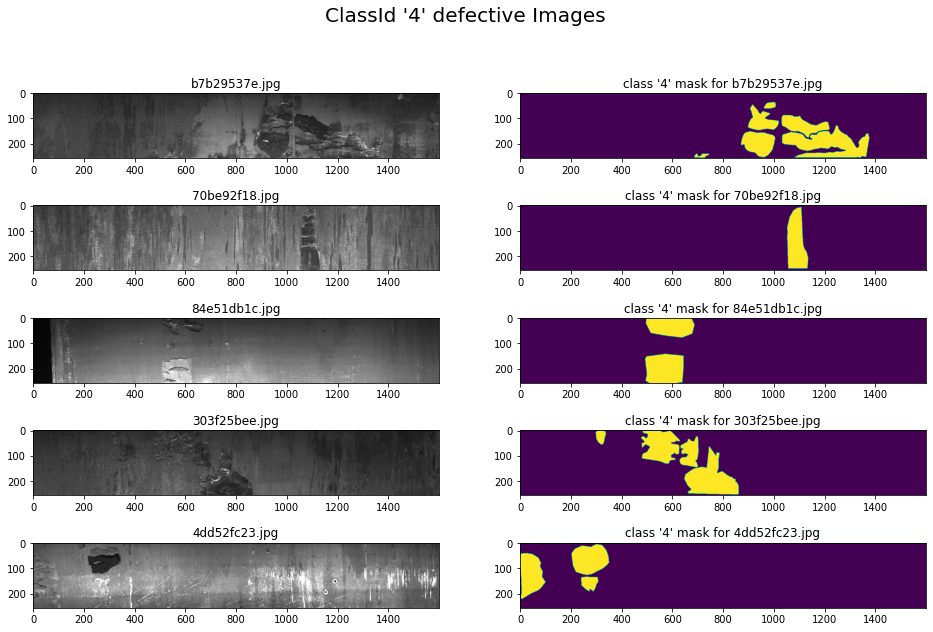

In [36]:
for ClassId in [1,2,3,4]:
    class_df = df[df['ClassId'] == ClassId]
    fig, axs = plt.subplots(5, 2, figsize=(16,10))
    fig.suptitle("ClassId '{}' defective Images".format(ClassId), fontsize=20)
    x,y = 0,0
    for i, img_id in enumerate(random.sample(set(class_df['ImageId'].values), 5)):
        img_obj = cv2.imread('train_images/'+ img_id)
        axs[i,0].imshow(img_obj)
        axs[i,0].set_title(img_id)
        rle = class_df[class_df['ImageId'] == img_id]['EncodedPixels'].iloc[0]
        mask = rle2mask(rle)
        axs[i,1].imshow(mask)
        axs[i,1].set_title("class '{}' mask for ".format(ClassId) + img_id)
    plt.show()
    print('='*100)

# Zaključak

Projekat je zamišljen na takav način da se primenom CNN vrste neuronske mreže izvrši kreiranje modela algoritma mašinskog učenja koji će biti u stanju da na ispravan način detektuje oštećenja i klasifikuje fotografije u odgovarajuće klase.

CNN je korišćena zato što mi je bila najrazumnija u ovom trenutku, nisam imala prilike da radim sa neuronskim mrežama u smislu da sam ja kreirala algoritam u kontekstu istih. Iz tog razloga a i zato što je moja tema bila ovakva CNN je bio prikladna opcija u ovom slučaju.

Što se tiče samog projekta, uočeno je da nakon 11 prolaska (epohe) kroz set fotografija, model prestaje da daje bolje rezultate za vrednosti gubitka zato je i prekinut trening nakon njega. Postignuta tačnost je 78%, odlučeno je da se prati tačnost zbog same teme, recall je bolji u nekim kontekstima poput medicine, ali ovde je sasvim korektan accuracy.

Verujem da algoritam može dodatno da se unapredi dodavanjem slojeva neuronske mreže, primenom drugih vrsta modela ili igranjem sa hiperparametrima.

# Literatura



1.   scikit-learn: machine learning in python, [scikit-learn](https://scikit-learn.org/stable/index.html)
2.   Vežbe 9, 10.

1.   Tensorflow - CNN, [CNN model](https://www.tensorflow.org/tutorials/images/cnn)
2.   Tensorflow core - python, [Tensorflow](https://www.tensorflow.org/api_docs/python/tf)

1.   Model training APIs, [Keras](https://keras.io/api/models/model_training_apis/)
2.   Geeks for Geeks, [GG](https://www.geeksforgeeks.org/choose-optimal-number-of-epochs-to-train-a-neural-network-in-keras/)




